<a href="https://colab.research.google.com/github/glenr6/ML-Playground/blob/main/Financial_Forecast_ML_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# import required libabries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [ ]:
# initialize API for data source and collect financial data into a data frame (df)

import requests

api_key = '7620QLCPVPCRT9XA'
symbol = 'TSLA'

# chose a new symbol after init

url = f'https://www.alphavantage.co/query?function=TIME_SERIES_DAILY_ADJUSTED&symbol={symbol}&outputsize=full&apikey={api_key}'
response = requests.get(url)
data = response.json()
df = pd.DataFrame(data['Time Series (Daily)']).transpose()
df.index = pd.to_datetime(df.index)
df = df.sort_index()

In [ ]:
# Preprocessing the data
# Extract closing prices
y = df['4. close'].values.astype(float)

# Normalize the closing prices
scaler = MinMaxScaler(feature_range=(0, 1))
y = scaler.fit_transform(y.reshape(-1, 1))

# Create the feature matrix
X = []
for i in range(60, len(df)):
    X.append(y[i-60:i, 0])
X = np.array(X)

# split data into training data and testing data
X_train, X_val, y_train, y_val = train_test_split(X, y[60:], test_size=0.2, shuffle=False)

In [ ]:
# Define the model paramaters
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(units=50))
model.add(Dense(units=1))

In [ ]:
# compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_val, y_val))

Epoch 1/100
79/79 [==============================] - 16s 85ms/step - loss: 0.0030 - val_loss: 0.0015
Epoch 2/100
79/79 [==============================] - 6s 77ms/step - loss: 0.0014 - val_loss: 0.0011
Epoch 3/100
79/79 [==============================] - 6s 73ms/step - loss: 0.0012 - val_loss: 0.0021
Epoch 4/100
79/79 [==============================] - 6s 79ms/step - loss: 0.0010 - val_loss: 8.2273e-04
Epoch 5/100
79/79 [==============================] - 6s 72ms/step - loss: 8.2531e-04 - val_loss: 0.0021
Epoch 6/100
79/79 [==============================] - 6s 81ms/step - loss: 7.6482e-04 - val_loss: 0.0011
Epoch 7/100
79/79 [==============================] - 6s 71ms/step - loss: 6.2707e-04 - val_loss: 7.8185e-04
Epoch 8/100
79/79 [==============================] - 7s 86ms/step - loss: 6.1656e-04 - val_loss: 0.0011
Epoch 9/100
79/79 [==============================] - 7s 88ms/step - loss: 5.9280e-04 - val_loss: 5.3867e-04
Epoch 10/100
79/79 [==============================] - 7s 83ms/step 

In [ ]:
# Evaluate the model on the validation set
y_pred = model.predict(X_val)
rmse = np.sqrt(mean_squared_error(y_val, y_pred))
print('Root Mean Squared Error:', rmse)

20/20 [==============================] - 2s 27ms/step
Root Mean Squared Error: 0.01910172383488712


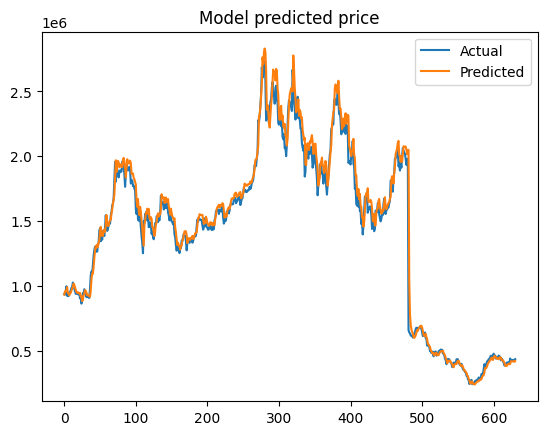

In [ ]:
# Visualize the results
y_pred = scaler.inverse_transform(y_pred)
y_val = scaler.inverse_transform(y_val)
plt.plot(y_val, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.title('Model predicted price')
plt.legend()
plt.show()

In [ ]:
last_60_days = y[-60:] 
last_60_days_scaled = scaler.transform(last_60_days.reshape(-1, 1))
X_test = []
X_test.append(last_60_days_scaled)
X_test = np.array(X_test)
X_test = np.reshape(X_test, (1, X_test.shape[1], 1))  # Reshape to (1, timesteps, features)

# Print the input shape to debug
print("Input shape: ", X_test.shape)

y_pred = model.predict(X_test, batch_size=1)
y_pred = scaler.inverse_transform(y_pred)
print('Predicted price:', y_pred[0][0])